Разбор задания от Тинкофф


In [2]:
import pandas as pd
import numpy as np
import math
from scipy.stats import kstest
from scipy.stats import shapiro
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


Выведем первые 5 строк предоставленного датасета.

In [4]:
data = pd.read_csv("data.csv", sep=",")
data.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Удаляю лишние столбы с ссылками на картинки.

In [5]:
to_delete = ['Flag', 'Photo', 'Club Logo']
for el in to_delete:
  data.drop(el, inplace=True, axis=1)
data.head(5)

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Имеем данные о 18207 футболистах, дубликаты не были найдены.

In [6]:
data.shape

(18207, 86)

In [7]:
data[data.duplicated(keep=False)]

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


Получены данные о футболистах.
Предоставленные столбцы: 

**Name** - имя

**Nationality** - национальность

**Overall** - общий показатель??

**Potential** - потенциал, метрика, которая позволит узнать насколько хорошо игрок себя проявит в следующих играх

**Club** - клуб, которому принадлежит игрок

**Value** - цена за игрока

**Wage** - зароботная плата футболисту

Общие метрики: имя, рост, вес, национальность, возраст, клуб, заробатная плата, цена за игрока, позиция в игре.

Ключевыми метриками я бы выбрала те, которые бы решали определенную задачу. Например, метрики можно поделить на следующие группы: связанные с физиологией (рост, вес), расчетливые(боевые метрики), технически метрики для атаки, технические метрики для защиты, психологические(концентрация, мотивация).

**Гипотезы, которые можно сформулировать**:
1. Существует ли статистически значимая разница между international reputations игроков из Европы и не Европы?
2. Что влияет на заработок игрока? Какими показателями должен обладать игрок, чтобы зарабатывать больше?
3. Игроки какой страны имеют наибольший показатель в агрессивной игре?
4. Влияет ли возраст на international reputation?  
5. Существует ли статистически значимая разница между international reputations игроков из Европы и не Европы?


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 86 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Nationality               18207 non-null  object 
 5   Overall                   18207 non-null  int64  
 6   Potential                 18207 non-null  int64  
 7   Club                      17966 non-null  object 
 8   Value                     18207 non-null  object 
 9   Wage                      18207 non-null  object 
 10  Special                   18207 non-null  int64  
 11  Preferred Foot            18159 non-null  object 
 12  International Reputation  18159 non-null  float64
 13  Weak Foot                 18159 non-null  float64
 14  Skill 

In [9]:
# Анализ датасета
# we are going to find out about numerical and non-numerical features
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print ('Категориальные признаки: ',categorical_columns)
print ('числовые признаки: ',numerical_columns)

Категориальные признаки:  ['Name', 'Nationality', 'Club', 'Value', 'Wage', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause']
числовые признаки:  ['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning'

Посмотрим на количество уникальных значений для всех представленных столбцов из датасета.

In [10]:
columns = data.columns
for col in columns:
  n = len(pd.unique(data[col]))
  print(f"No.of.unique values for {col}: {n}")

No.of.unique values for Unnamed: 0: 18207
No.of.unique values for ID: 18207
No.of.unique values for Name: 17194
No.of.unique values for Age: 29
No.of.unique values for Nationality: 164
No.of.unique values for Overall: 48
No.of.unique values for Potential: 47
No.of.unique values for Club: 652
No.of.unique values for Value: 217
No.of.unique values for Wage: 144
No.of.unique values for Special: 1422
No.of.unique values for Preferred Foot: 3
No.of.unique values for International Reputation: 6
No.of.unique values for Weak Foot: 6
No.of.unique values for Skill Moves: 6
No.of.unique values for Work Rate: 10
No.of.unique values for Body Type: 11
No.of.unique values for Real Face: 3
No.of.unique values for Position: 28
No.of.unique values for Jersey Number: 100
No.of.unique values for Joined: 1737
No.of.unique values for Loaned From: 342
No.of.unique values for Contract Valid Until: 37
No.of.unique values for Height: 22
No.of.unique values for Weight: 58
No.of.unique values for LS: 94
No.of.uni

Построим график, по которому можно узнать сколько футболистов представляют свою страну.

In [11]:
# Countries of Soccer Player Number
import plotly.express as px

x1 = list(data.Nationality.unique())
y1 = list(len(data[data["Nationality"]==each]) for each in x1)

df=pd.DataFrame()
df["Country"]=x1
df["NumberOfPlayers"]=y1

df_n=df.sort_values("NumberOfPlayers",ascending=False)
fig = px.bar(df_n, x="NumberOfPlayers", y="Country", orientation='h',title=" Countries with the Most Players")
fig.show()

Выведем топ 20 стран с наибольшим количеством игроков.
Можно заметить, что самое большое количество футболистов из Англии.

In [12]:
fig = px.bar(df_n.head(20), x="NumberOfPlayers", y="Country", orientation='h',title="Top 20 Countries with the Most Players")
fig.show()

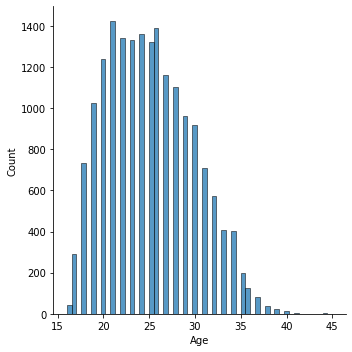

In [13]:
sns_plot = sns.displot(data['Age'])

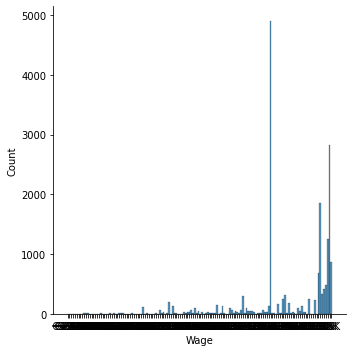

In [14]:
sns_plot = sns.displot(data['Wage'])

На матрице корреляций выводим коэффициент корреляции для соответствующих пар признаков.

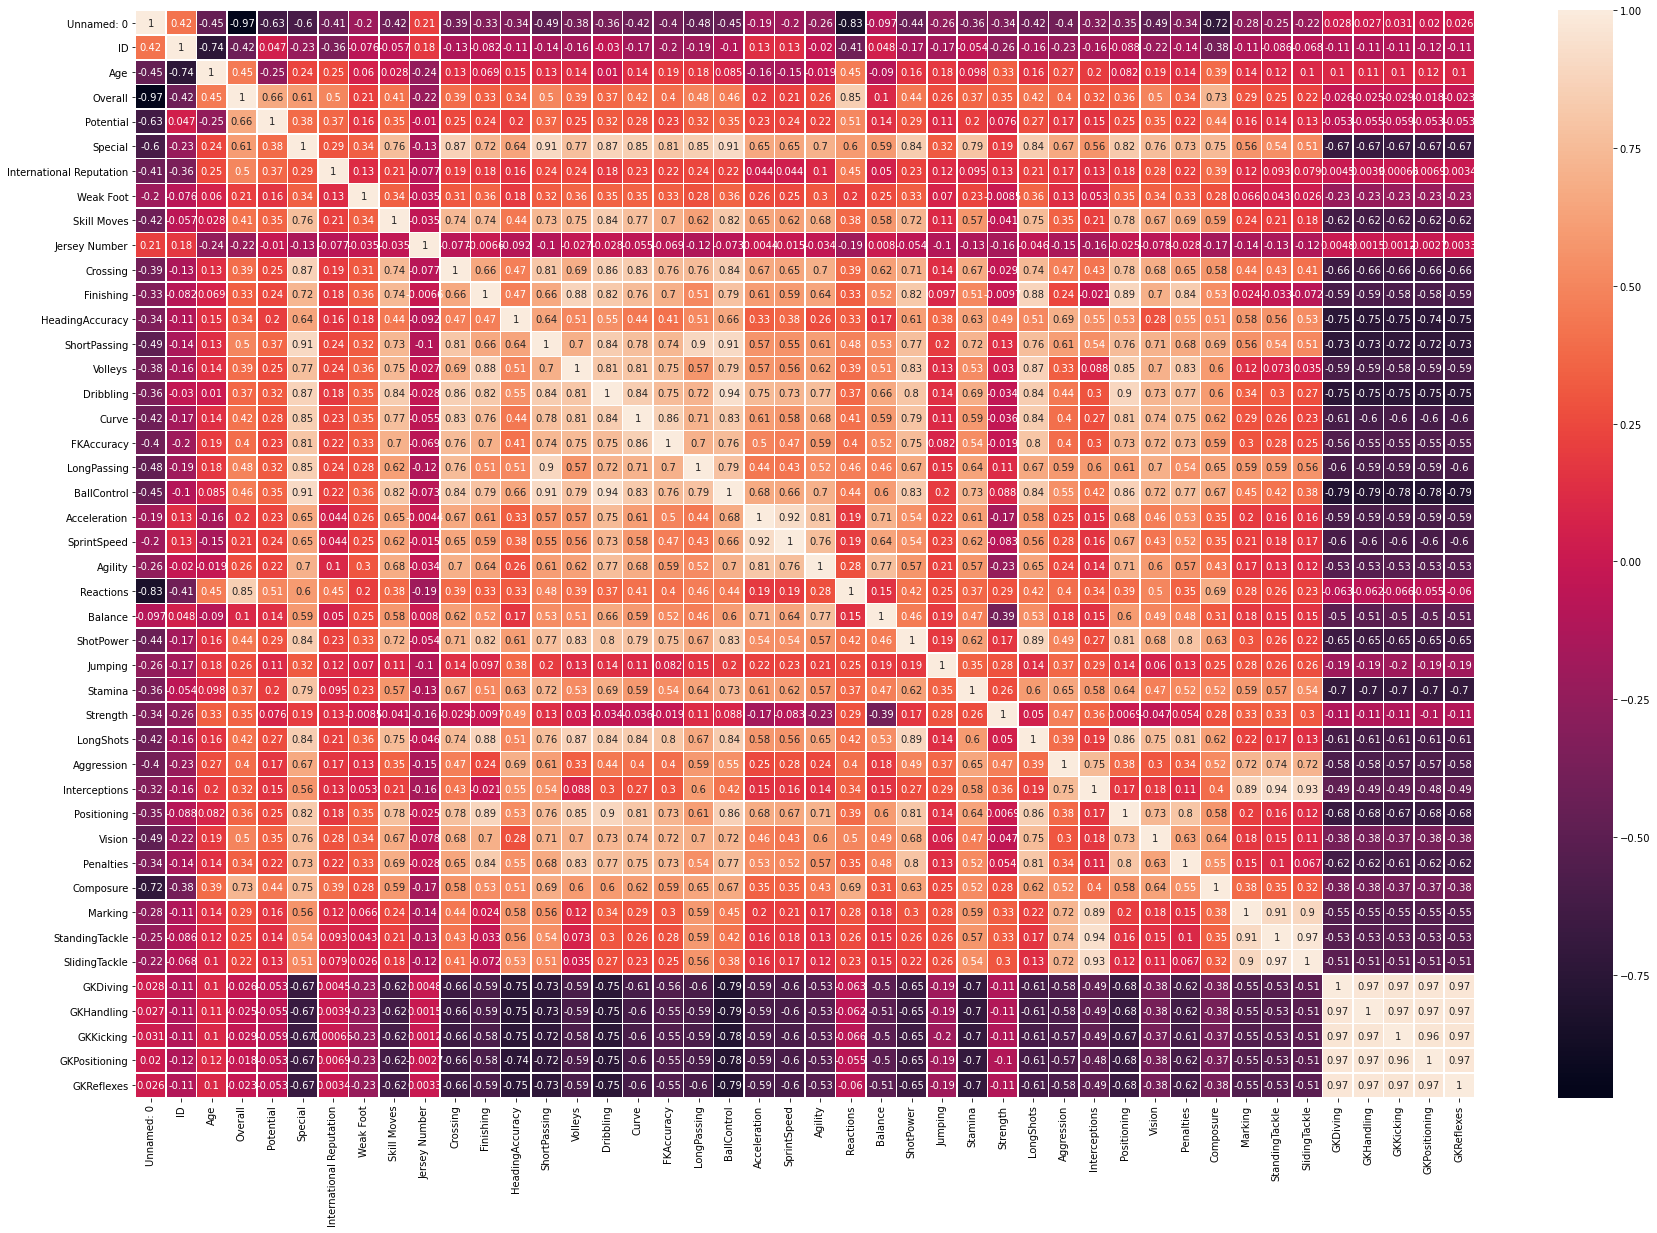

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True,linewidth=0.5)

Была поставлена задача найти ребят, которые еще не так известны, но стоят того, чтобы их взять к себе в команду. Особенно нам интересны те, за которых можно заплатить меньше всего.

Поработаем с определёнными данными из датасета, возьмем только имя, возраст, overall, potential, value, wage.

In [16]:
new = data.filter(['Name','Age','Overall','Potential', 'Value', 'Wage'], axis=1)
new.head(10) 

,Name,Age,Overall,Potential,Value,Wage
0,L. Messi,31,94,94,€110.5M,€565K
1,Cristiano Ronaldo,33,94,94,€77M,€405K
2,Neymar Jr,26,92,93,€118.5M,€290K
3,De Gea,27,91,93,€72M,€260K
4,K. De Bruyne,27,91,92,€102M,€355K
5,E. Hazard,27,91,91,€93M,€340K
6,L. Modrić,32,91,91,€67M,€420K
7,L. Suárez,31,91,91,€80M,€455K
8,Sergio Ramos,32,91,91,€51M,€380K
9,J. Oblak,25,90,93,€68M,€94K


In [17]:
def modify_values(val):
  n = len(val)
  val = val[1:n]
  if 'K' in val:
    if '.' in val:
      val = val.replace('.', '') 
    val = val.replace('K', '')
    val += '000'  
  if 'M' in val:
    if '.' in val:
      val = val.replace('.', '') 
    val = val.replace('M', '')
    val += '00000'    
  return val   

new['Value'] = new['Value'].apply(modify_values)
new['Wage'] = new['Wage'].apply(modify_values)  
new['Value'] = pd.to_numeric(new['Value'])
new['Wage'] = pd.to_numeric(new['Wage'])
new.head(10)
#new.dtypes

,Name,Age,Overall,Potential,Value,Wage
0,L. Messi,31,94,94,110500000,565000
1,Cristiano Ronaldo,33,94,94,7700000,405000
2,Neymar Jr,26,92,93,118500000,290000
3,De Gea,27,91,93,7200000,260000
4,K. De Bruyne,27,91,92,10200000,355000
5,E. Hazard,27,91,91,9300000,340000
6,L. Modrić,32,91,91,6700000,420000
7,L. Suárez,31,91,91,8000000,455000
8,Sergio Ramos,32,91,91,5100000,380000
9,J. Oblak,25,90,93,6800000,94000


Создадим парные графики,чтобы понять, что у нас происходит в новом датасете new.

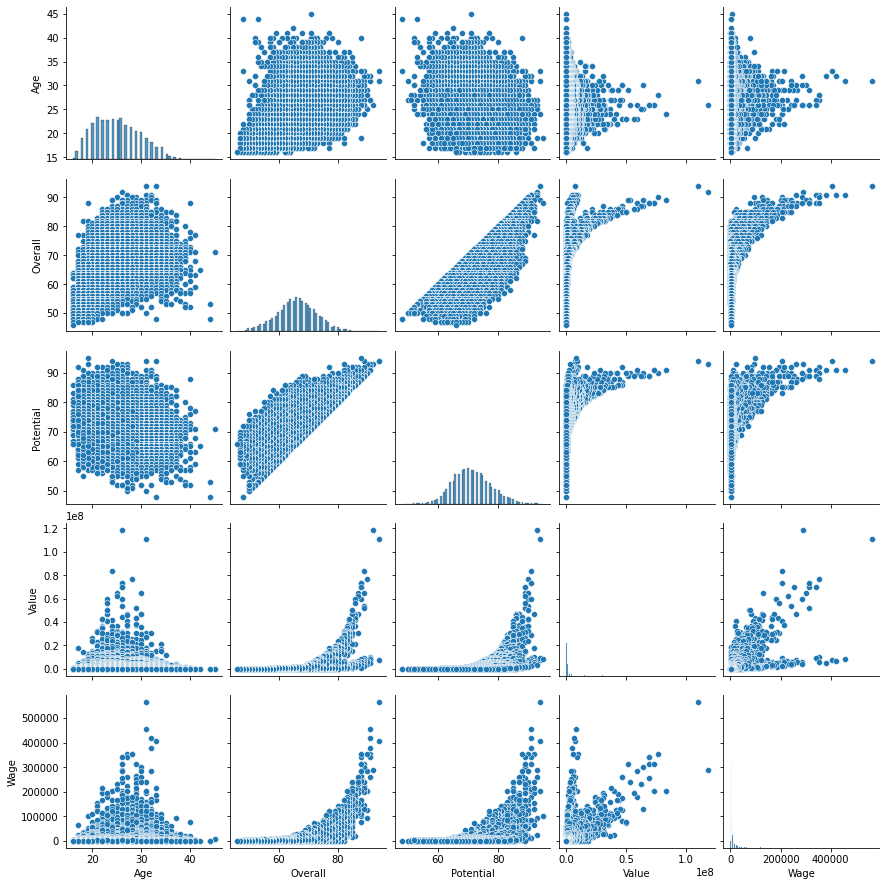

In [18]:
sns.pairplot(new)

Посторим график рассеивания для того чтобы узнать как overall коррелирует с potential игроков. Также построим регрессионную прямую на этом же графике рассеивания.

No handles with labels found to put in legend.


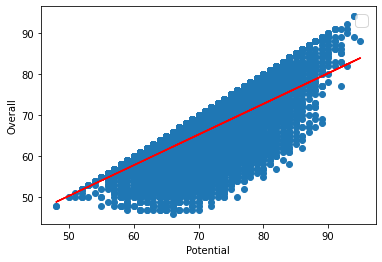

In [19]:
plt.scatter(new['Potential'], new['Overall'])
plt.legend(loc='best', fontsize=16)
plt.xlabel('Potential')
plt.ylabel('Overall')

m, b = np.polyfit(new['Potential'], new['Overall'], 1)

plt.plot(new['Potential'], m*new['Potential'] + b, 'r')

Коэффициент корреляции для данного графика рассеивания где-то примерно 0.661, что дает нам понять, что здесь присутствует умеренное положительное отношение между рассматриваемыми переменными.

In [20]:
np.corrcoef(new['Potential'], new['Overall'])[0, 1]

0.6609385409937797

Здесь можно глянуть на корреляционную таблицу из всех представленных переменных из датасета new.

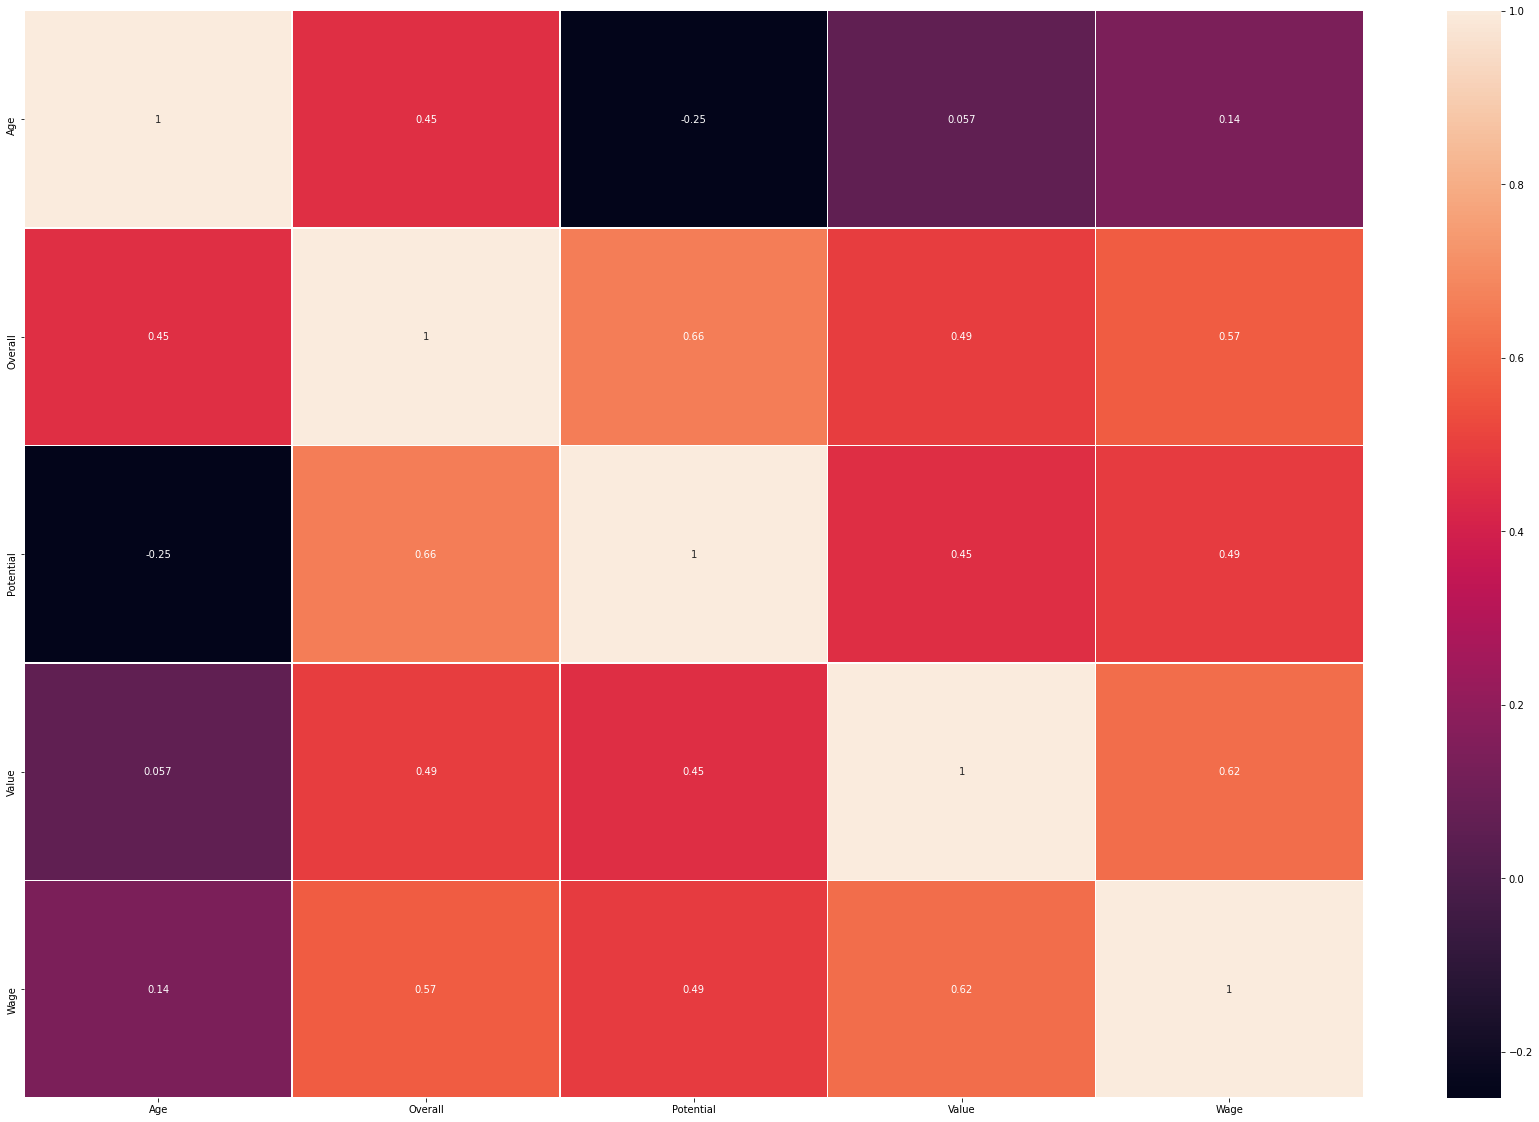

In [21]:
plt.figure(figsize=(30,20))
sns.heatmap(new.corr(),annot=True,linewidth=0.5)

Из вышеупомянутой корреляционной таблицы можно сделать вывод, что возраст, зарплата и цена за игрока также имеют положительное отношение с переменной overall.

In [22]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

split = np.random.rand(len(new)) < 0.8
train_data = new[split]
test_data = new[~split]
print("train: ",train_data.shape, "\ntest_data: ", test_data.shape)

train:  (14618, 6) 
test_data:  (3589, 6)


Датасет разбили на 2 группы. 

train_data - датасет, который содержит данные, которые мы будем использовать для прогнозов

test_data - датасет, который содержит данные, которые мы пытаемся предсказать

Построим и обучим нашу модель линейной регрессии.

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#training dataset
x_train = train_data[['Age', 'Value', 'Potential', 'Wage']]
y_train = train_data[['Overall']]

#x_train_poly = PolynomialFeatures(degree=4).fit_transform(x_train)

model = LinearRegression().fit(x_train, y_train)


In [24]:
r_sq = model.score(x_train, y_train) # коэффициент детерминации r-squared
r_sq

0.8572369916041362

In [25]:
intercept, coefficients = model.intercept_, model.coef_
intercept, coefficients

(array([-17.95901593]),
 array([[9.34134628e-01, 1.30511290e-07, 8.45701539e-01, 2.10093877e-05]]))

Большие коэффициенты для конкретной переменной означают, что эта переменная имеет большое влияние на значение переменной, которую мы пытаемся предсказать. Точно так же небольшие значения имеют небольшое влияние.

В данном случае переменная возраста имеет большее влияние на значение overall.

In [26]:
y_pred = model.predict(x_train)
y_pred.shape

(14618, 1)

(3589, 1)

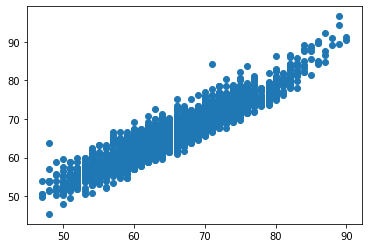

In [35]:
x_test = test_data[['Age', 'Value', 'Potential', 'Wage']]
y_test = test_data[['Overall']]
#x_test_poly = PolynomialFeatures(degree=4).fit_transform(x_test)
y_test_predict = model.predict(x_test)
plt.scatter(y_test, y_test_predict)

Наши предсказанные значения очень близки к фактическим значениям.

После обучения модели были созданы 2 таблицы для train_data и test_data с предсказанным рейтингом Predicted Ratings.

In [44]:
train_predict = model.predict(x_train)
train_data['Predicted Ratings'] = train_predict
train_data.sort_values(by=['Predicted Ratings'], ascending=False).head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Age,Overall,Potential,Value,Wage,Predicted Ratings
0,L. Messi,31,94,94,110500000,565000,116.786904
2,Neymar Jr,26,92,93,118500000,290000,106.537038
1,Cristiano Ronaldo,33,94,94,7700000,405000,101.877110
11,T. Kroos,28,90,90,76500000,355000,101.752339
23,S. Agüero,30,89,89,64500000,300000,100.053254
30,Isco,26,88,91,73500000,315000,99.497861
6,L. Modrić,32,91,91,6700000,420000,98.590501
7,L. Suárez,31,91,91,8000000,455000,98.561359
32,Coutinho,26,88,89,69500000,340000,97.809648
20,Sergio Busquets,29,89,89,51500000,315000,97.737614


In [45]:
train_data.sort_values(by=['Predicted Ratings'], ascending=False).loc[train_data['Overall'] >= 50]

,Name,Age,Overall,Potential,Value,Wage,Predicted Ratings
0,L. Messi,31,94,94,110500000,565000,116.786904
2,Neymar Jr,26,92,93,118500000,290000,106.537038
1,Cristiano Ronaldo,33,94,94,7700000,405000,101.877110
11,T. Kroos,28,90,90,76500000,355000,101.752339
23,S. Agüero,30,89,89,64500000,300000,100.053254
...,...,...,...,...,...,...,...
17525,S. Moloney,18,54,59,60000,1000,48.780638
17949,L. Catherall,18,51,59,40000,1000,48.778028
18045,M. Humpenöder,19,50,57,30000,1000,48.019454
17212,L. Hlabi,18,55,58,100000,1000,47.940157


In [46]:
test_data['Predicted Ratings'] = y_test_predict
test_data.sort_values(by=['Predicted Ratings'], ascending=False).head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Age,Overall,Potential,Value,Wage,Predicted Ratings
16,H. Kane,24,89,91,83500000,205000,96.623672
19,T. Courtois,26,89,90,53500000,240000,94.466230
52,M. Hamšík,30,87,87,46500000,125000,92.336005
12,D. Godín,32,90,90,4400000,125000,91.246854
39,Thiago Silva,33,88,88,2400000,165000,91.068938
10,R. Lewandowski,29,90,90,7700000,205000,90.555888
60,R. Sterling,23,86,89,56500000,195000,90.264236
65,Douglas Costa,27,86,86,46500000,175000,89.738369
75,Fernandinho,33,86,86,1800000,185000,89.719416
15,P. Dybala,24,89,94,8900000,205000,89.424635


In [47]:
test_data.sort_values(by=['Predicted Ratings'], ascending=False).loc[test_data['Overall'] <= 50]

,Name,Age,Overall,Potential,Value,Wage,Predicted Ratings
18183,K. Pilkington,44,48,48,0,1000,63.757591
18028,D. Asonganyi,17,50,73,70000,1000,59.687630
18134,F. Ranocchia,17,49,72,60000,1000,58.840624
18019,S. Al Wehimid,20,50,67,50000,2000,57.434224
18170,Nicolas Firmino,17,48,70,60000,1000,57.149221
18110,G. Tegue,18,50,68,50000,1000,56.390647
18143,W. Henry,19,49,66,50000,1000,55.633379
18129,J. James,18,49,67,50000,1000,55.544945
18021,A. Ousou,18,50,67,50000,1000,55.544945
18015,T. Jacobsen,20,50,64,60000,1000,54.877415


In [30]:
from sklearn import metrics

metrics.mean_absolute_error(y_test, y_test_predict)

2.026206433762999

In [31]:
metrics.mean_squared_error(y_test, y_test_predict)

6.6305531790357355

In [32]:
np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))

2.5749860541439316